<a href="https://colab.research.google.com/github/Ohwdyaa/Dataset-wine/blob/main/Tugas_kb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
dataset=pd.read_csv('wine1.csv')
dataset.dropna(how='any')
dataset['Overall Acidity']=(dataset['fixed acidity']+dataset['volatile acidity'])/2
dataset['Overall Sulfur Dioxide']=(dataset['free sulfur dioxide']+dataset['total sulfur dioxide'])/2
dataset['Quality']=dataset['quality']
df=dataset.drop(columns=['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','quality'])
df

citric acid  residual sugar  chlorides  density     pH  sulphates  \
1 14.23         15.6             127       2.80     2.29   5.64       1.04   
  13.16         18.6             101       2.80     2.81   5.68       1.03   
  14.37         16.8             113       3.85     2.18   7.80       0.86   
  13.24         21.0             118       2.80     1.82   4.32       1.04   
  14.20         15.2             112       3.27     1.97   6.75       1.05   
...              ...             ...        ...      ...    ...        ...   
3 13.71         20.5              95       1.68     1.06   7.70       0.64   
  13.40         23.0             102       1.80     1.41   7.30       0.70   
  13.27         20.0             120       1.59     1.35  10.20       0.59   
  13.17         20.0             120       1.65     1.46   9.30       0.60   
  14.13         24.5              96       2.05     1.35   9.20       0.61   

         alcohol  Overall Acidity  Overall Sulfur Dioxide  Quality  
1 14.23     3.92            2.070                   1.670     1065  
  13.16     3.17            2.515                   1.770     1185  
  14.37     3.45            2.225                   1.865     1480  
  13.24     2.93            2.730                   1.540      735  
  14.20     2.85            2.105                   1.865     1450  
...          ...              ...                     ...      ...  
3 13.71     1.74            4.050                   0.565      740  
  13.40     1.56            3.195                   0.590      750  
  13.27     1.56            3.270                   0.560      835  
  13.17     1.62            2.480                   0.605      840  
  14.13     1.60            3.420                   0.660      560  

[177 rows x 10 columns]

In [ ]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [ ]:
Y=Y.reshape(len(Y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=0)
svc.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [ ]:
y_pred = svc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1035 1120]
 [ 520  480]
 [ 520  355]
 [ 680  970]
 [ 520  380]
 [ 520  365]
 [1035 1045]
 [ 520  520]
 [ 520  488]
 [ 520  450]
 [ 680  695]
 [ 520  415]
 [1035 1290]
 [ 520  406]
 [ 680  750]
 [ 680  714]
 [1035 1095]
 [ 680  845]
 [ 625  630]
 [1035 1190]
 [ 520  510]
 [1035 1020]
 [1035 1450]
 [ 520  315]
 [ 520  450]
 [ 625  607]
 [ 520  466]
 [ 520  562]
 [ 520  434]
 [ 625  615]
 [1035 1285]
 [1035 1270]
 [ 625  630]
 [1035 1065]
 [1035 1045]
 [1035 1080]
 [ 680  680]
 [ 520  290]
 [ 680  937]
 [ 680  750]
 [ 680  830]
 [1035 1515]
 [ 520  345]
 [ 520  438]
 [ 520  385]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test, y_pred)*100)

[[  0   0   1   1   0   0]
 [  0   0   4  10   0   0]
 [  0   0  64 105   0   0]
 [  0   0  33 137   0   0]
 [  0   0   2  38   0   0]
 [  0   0   1   4   0   0]]
50.24999999999999


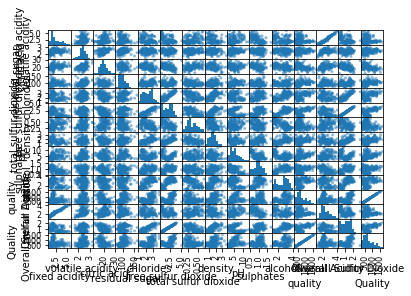

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()